#Failure prediction on Suspenion Parts
**Problem**

The Lifespan and a failure of suspension components based on varying load conditions, terrain and material properties.
These failures may leads to downtime, increased maintenance cost and other safety issues.

**Solution**

By Building a predictive model, that uses real world vehicle data such as different load condition , road type, material properties , past failure data and to predict suspension failures.

In [ ]:
#Importing neccassary data
import numpy as np , pandas as pd, matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Generating a Synthetic data
np.random.seed(42)
num_samples=100000

##Data Collection

In [ ]:
data = {
    "vehicle_load_tons": np.random.uniform(5, 60, num_samples), #vehicle tonnage from 5T to 60T
    "road_type": np.random.choice([0, 1, 2], num_samples),  # Encoded: highway=0, off-road=1, mixed=2
    "shock_absorber_health": np.random.uniform(20, 100, num_samples),# Here the health is considered between 20% to 100%
    "suspension_travel_mm": np.random.uniform(30, 100, num_samples), # Shock absorber compression and Extension length
    "vehicle_age_years": np.round(np.random.uniform(0, 15, num_samples),2)
}

In [ ]:
# Factors affecting Suspension Components
#Vehicle Load = Max Load (55T) and considered 40% of load will impact on suspension failures
#Road_type =30% of road condition will impact on suspension failures
#Shock absorber health = 30% of shock absorber health will impact on suspension failures
#Suspension travel and Vehicle age also causes suspension failures by 20% and 30% respectively.

In [ ]:
failure_prob = (
    (data["vehicle_load_tons"] / 55) * 0.4 +
    (data["road_type"] / 2) * 0.3 +
    ((100 - np.array(data["shock_absorber_health"])) / 100) * 0.3 +
    (data["suspension_travel_mm"] / 300) * 0.2 +
    (data["vehicle_age_years"] / 15) * 0.3
)

In [ ]:
failure_prob = np.clip(failure_prob, 0, 1)
data["failure_occurred"] = [1 if np.random.rand() < prob else 0 for prob in failure_prob] #If random number less than Probability than the component will be a failed one.

In [ ]:
df=pd.DataFrame(data)
df.head()

,vehicle_load_tons,road_type,shock_absorber_health,suspension_travel_mm,vehicle_age_years,failure_occurred
0,25.599707,1,83.976160,31.494545,8.74,0
1,57.289287,1,88.968104,62.162796,13.95,1
2,45.259667,2,88.439415,57.934144,12.02,1
3,37.926217,0,90.088281,85.674940,13.56,1
4,13.581025,0,96.237882,41.715279,7.12,1


##Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vehicle_load_tons      100000 non-null  float64
 1   road_type              100000 non-null  int64  
 2   shock_absorber_health  100000 non-null  float64
 3   suspension_travel_mm   100000 non-null  float64
 4   vehicle_age_years      100000 non-null  float64
 5   failure_occurred       100000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 4.6 MB


In [ ]:
df.describe()

,vehicle_load_tons,road_type,shock_absorber_health,suspension_travel_mm,vehicle_age_years,failure_occurred
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,32.471854,0.998540,60.044799,64.894423,7.504610,0.693610
std,15.858780,0.814484,23.118630,20.226802,4.329507,0.460996
min,5.000305,0.000000,20.001671,30.000628,0.000000,0.000000
25%,18.725032,0.000000,39.962772,47.326244,3.740000,0.000000
50%,32.534638,1.000000,60.109339,64.904367,7.510000,1.000000
75%,46.223255,2.000000,80.055999,82.383008,11.260000,1.000000
max,59.999562,2.000000,99.997680,99.999952,15.000000,1.000000


In [ ]:
plt.rcParams['figure.figsize'] = (20,8)

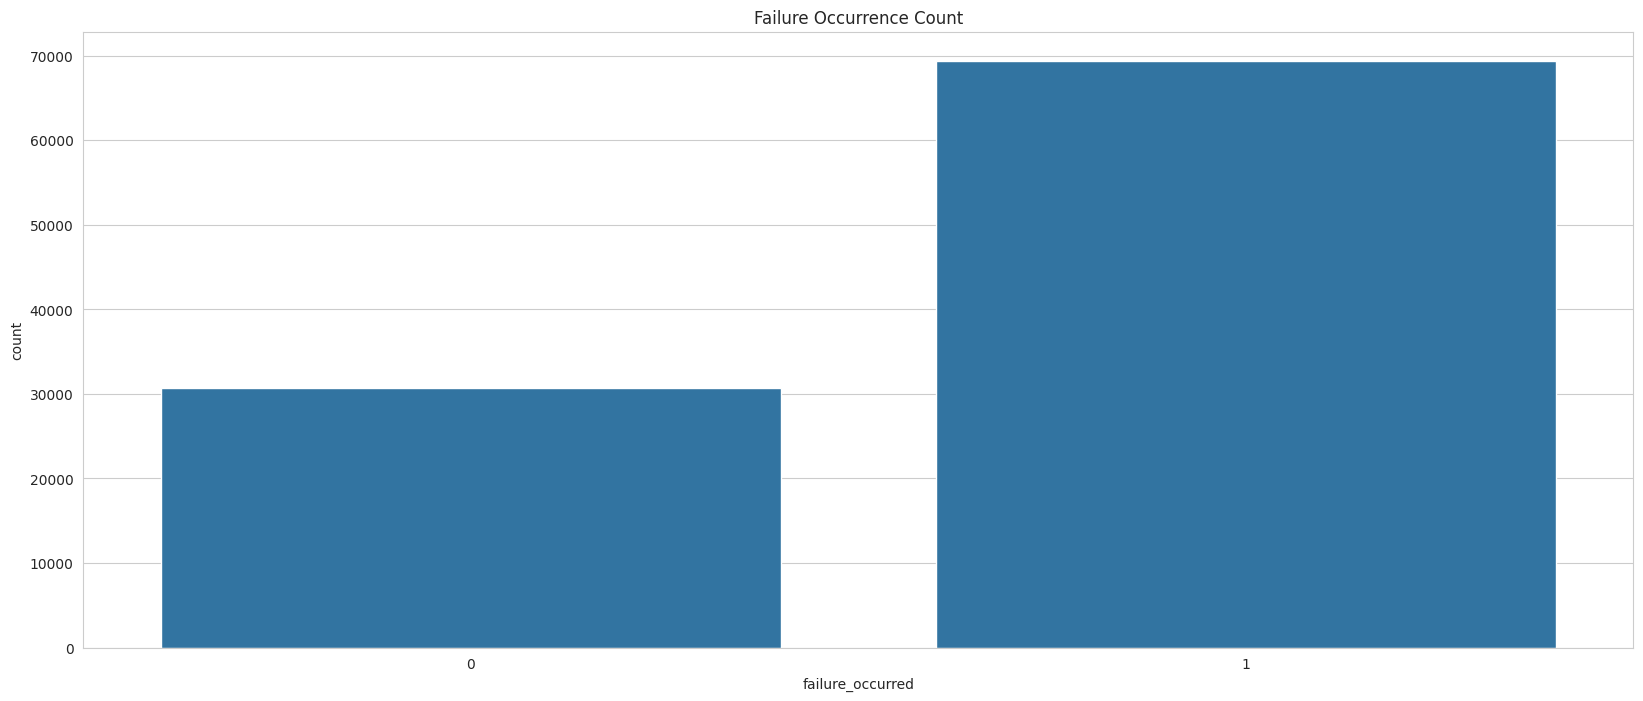

In [ ]:
#Bar chrt to visualize the Number of Failure occurences
sns.set_style("whitegrid")
sns.countplot(x=df["failure_occurred"])
plt.title("Failure Occurrence Count")
plt.show()

In [ ]:
df["failure_occurred"].value_counts()

,count
failure_occurred,
1,69361
0,30639


From the above,out of 1 lakh observations 69302 componenst were failed due to multiple reason

#**Training a Model**

In [ ]:
#Importing Necessary data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



##Segregating the Target Variable from the features

In [ ]:
X = df.drop(columns=["failure_occurred"])
y = df["failure_occurred"]
X.shape,y.shape

((100000, 5), (100000,))

##Splitting the data using Train Test method

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model Training

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.70655
              precision    recall  f1-score   support

           0       0.53      0.37      0.43      6098
           1       0.75      0.86      0.80     13902

    accuracy                           0.71     20000
   macro avg       0.64      0.61      0.62     20000
weighted avg       0.69      0.71      0.69     20000



#Saving the Model

In [ ]:
import pickle

In [ ]:
pickle_out = open("suspension_model.pkl", mode="wb")
pickle.dump(model,pickle_out)
pickle_out.close()

In [ ]:
model_pickle = open ("suspension_model.pkl","rb")
model = pickle.load(model_pickle)

##Test prediction for a sample data

In [ ]:
df.columns

Index(['vehicle_load_tons', 'road_type', 'shock_absorber_health',
       'suspension_travel_mm', 'vehicle_age_years', 'failure_occurred'],
      dtype='object')